# Assignment-2

# **Convolution **

**Downloading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Copying images to training, validation, and test directories**

In [ ]:
import os
import shutil
import pathlib

# Define original folders separately
original_train_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small/train")
original_val_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small/validation")
original_test_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small/test")

# Define destination base directory
new_base_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small 2/small_dataset_balanced")

def make_subset_from_folder(subset_name, original_folder, start_index, end_index):

    print(f"\nCreating '{subset_name}' from {original_folder} indices {start_index} to {end_index}")

    for category in ["cats", "dogs"]:
        src_dir = original_folder / category
        dest_dir = new_base_dir / subset_name / category

        os.makedirs(dest_dir, exist_ok=True)

        files = sorted(os.listdir(src_dir))

        # Adjust end_index if it's too big
        if end_index > len(files):
            print(f" WARNING: end_index {end_index} exceeds available files ({len(files)}). Adjusting.")
            end_index = len(files)

        subset_files = files[start_index:end_index]
        print(f"Copying {len(subset_files)} '{category}' images to '{dest_dir}'...")

        for fname in subset_files:
            src_file = src_dir / fname
            dst_file = dest_dir / fname
            shutil.copyfile(src_file, dst_file)

    print(f" {subset_name} created from {original_folder}.")

def main():


   # 1000 images from original train folder for training
    make_subset_from_folder("train", original_train_dir, 0, 500)

    # 250 images from original validation folder for validation
    make_subset_from_folder("validation", original_val_dir, 0, 250)

    # 250 images from original test folder for testing
    make_subset_from_folder("test", original_test_dir, 0, 250)

if __name__ == "__main__":
    main()



Creating 'train' from /content/drive/MyDrive/AML/cats_vs_dogs_small/train indices 0 to 500
Copying 500 'cats' images to '/content/drive/MyDrive/AML/cats_vs_dogs_small 2/small_dataset_balanced/train/cats'...
Copying 500 'dogs' images to '/content/drive/MyDrive/AML/cats_vs_dogs_small 2/small_dataset_balanced/train/dogs'...
✅ train created from /content/drive/MyDrive/AML/cats_vs_dogs_small/train.

Creating 'validation' from /content/drive/MyDrive/AML/cats_vs_dogs_small/validation indices 0 to 250
Copying 250 'cats' images to '/content/drive/MyDrive/AML/cats_vs_dogs_small 2/small_dataset_balanced/validation/cats'...
Copying 250 'dogs' images to '/content/drive/MyDrive/AML/cats_vs_dogs_small 2/small_dataset_balanced/validation/dogs'...
✅ validation created from /content/drive/MyDrive/AML/cats_vs_dogs_small/validation.

Creating 'test' from /content/drive/MyDrive/AML/cats_vs_dogs_small/test indices 0 to 250
Copying 250 'cats' images to '/content/drive/MyDrive/AML/cats_vs_dogs_small 2/small_

In [ ]:
make_subset_from_folder("train", original_train_dir, 0, 500)
make_subset_from_folder("validation", original_val_dir, 0, 250)
make_subset_from_folder("test", original_test_dir, 0, 250)


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)



# **Training the convent network from scratch**

**Model 1:Training sample of 1000, a validation sample of 500, and a test sample of 500**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Data preprocessing**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

# Base directory for the subsets
subset_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small 2/small_dataset_balanced")

# Load datasets
train_dataset = image_dataset_from_directory(
    subset_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    subset_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    subset_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.9918 - loss: 0.0319 - val_accuracy: 0.7020 - val_loss: 1.4241
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.9784 - loss: 0.0562 - val_accuracy: 0.6980 - val_loss: 1.6040
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9907 - loss: 0.0445 - val_accuracy: 0.6720 - val_loss: 1.6145
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 224ms/step - accuracy: 0.9748 - loss: 0.0598 - val_accuracy: 0.7040 - val_loss: 1.4100
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.9899 - loss: 0.0313 - val_accuracy: 0.6760 - val_loss: 1.9088
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.9866 - loss: 0.0358 - val_accuracy: 0.7140 - val_loss: 1.8536
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.9952 - loss: 0.0194 - val_accuracy: 0.7040 - val_loss: 1.9225
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.9916 - loss: 0.0419 - val_accuracy: 

**Displaying curves of loss and accuracy during training**

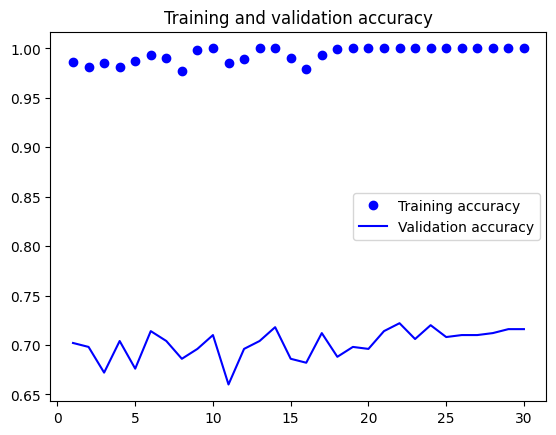

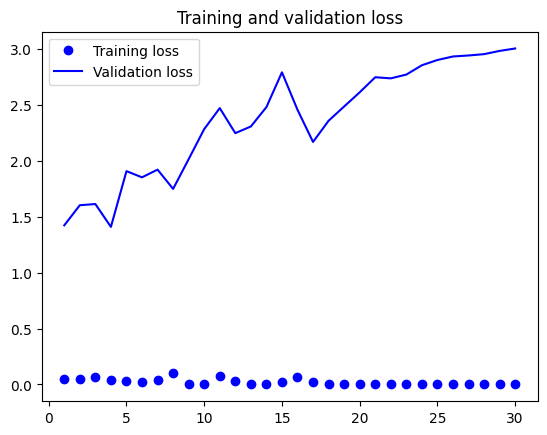

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6954 - loss: 1.3531
Test accuracy: 0.680


Since the validation and the tes accuracy of the model is very low that is 68%

To improve performance in developing a network that we trained from scratch, we will train our model on following techniques.

**Model 1a: Using Data Augmentation**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
     callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.4788 - loss: 0.7291 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.5202 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.8568
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.4901 - loss: 0.7313 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.4770 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.7123
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.5161 - loss: 0.6943 - val_accuracy: 0.5340 - val_loss: 0.6901
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.5673 - loss: 0.6866 - val_accuracy: 0.5560 - val_loss: 0.6743
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.6490 - loss: 0.6765 - val_accuracy: 0.5560 - val_loss: 0.7657
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.5770 - loss: 0.6862 - val_accuracy: 0

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.7073 - loss: 0.5761
Test accuracy: 0.698


**Defining a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

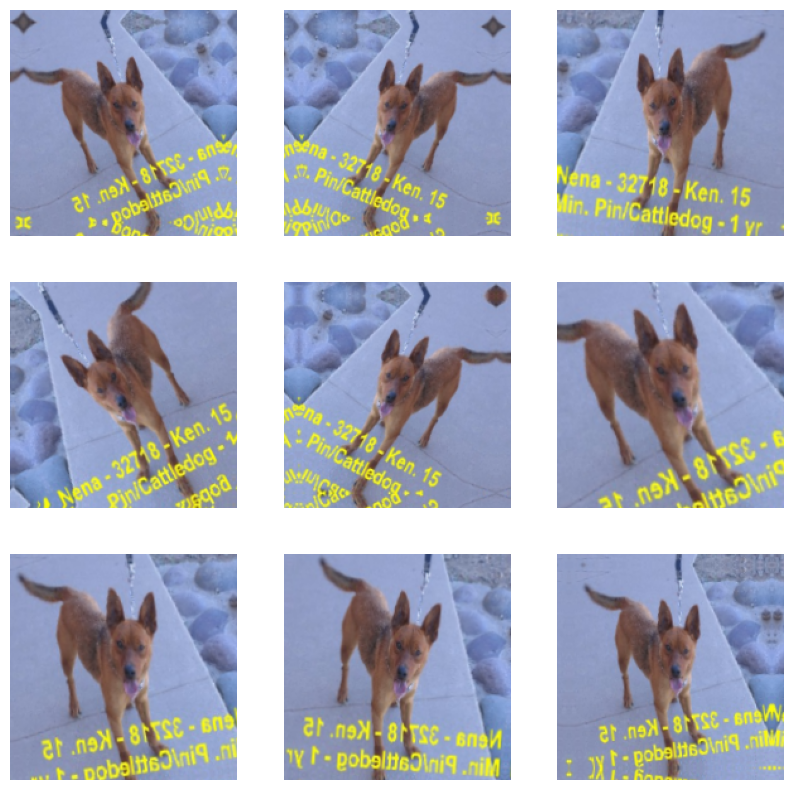

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Model 1b: Using Dropout Method**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - accuracy: 0.5066 - loss: 0.8214 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 179ms/step - accuracy: 0.5061 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.5237 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.5815 - loss: 0.7001 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.5315 - loss: 0.6916 - val_accuracy: 0.5080 - val_loss: 0.6986
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.5505 - loss: 0.6859 - val_accuracy: 0.6500 - val_loss: 0.6789
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.6091 - loss: 0.6677 - val_accuracy: 0.5320 - val_loss: 0.9232
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.5876 - loss: 0.6922 - val_accuracy:

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6615 - loss: 0.6635
Test accuracy: 0.664


**Model 1c: Using both Image Augmentation and Dropout mthod**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.4988 - loss: 0.7296 - val_accuracy: 0.5020 - val_loss: 0.6926
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.4889 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.4861 - loss: 0.6940 - val_accuracy: 0.5060 - val_loss: 0.6919
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.5275 - loss: 0.6920 - val_accuracy: 0.5600 - val_loss: 0.6873
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.5442 - loss: 0.6879 - val_accuracy: 0.5000 - val_loss: 0.7319
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.5297 - loss: 0.6964 - val_accuracy: 0.5860 - val_loss: 0.6790
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.6028 - loss: 0.6752 - val_accuracy: 0.6240 - val_loss: 0.6571
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.6163 - loss: 0.6623 - val_accuracy:

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.7453 - loss: 0.5599
Test accuracy: 0.696


**Model 2) Increasing the Training sample size to 1500.Including Maxpooling,Data Augmentation and Dropout technique with dropout rate of 0.5**

In [ ]:
import os
import shutil
import pathlib

# Define original folders (your dataset path)
original_train_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small/train")
original_val_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small/validation")
original_test_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small/test")

# Destination for balanced dataset subsets
new_base_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small_subset")

def make_subset_from_folder(subset_name, original_folder, start_index, end_index):
    print(f"\nCreating '{subset_name}' subset from {original_folder} [{start_index}:{end_index}]")

    for category in ["cats", "dogs"]:
        src_dir = original_folder / category
        dest_dir = new_base_dir / subset_name / category

        # Clean old files if they exist
        if dest_dir.exists():
            shutil.rmtree(dest_dir)

        os.makedirs(dest_dir, exist_ok=True)

        files = sorted(os.listdir(src_dir))

        # Validate end_index
        if end_index > len(files):
            print(f" WARNING: end_index {end_index} exceeds available files ({len(files)}). Adjusting.")
            end_index = len(files)

        subset_files = files[start_index:end_index]
        print(f"Copying {len(subset_files)} '{category}' images to '{dest_dir}'...")

        for fname in subset_files:
            src_file = src_dir / fname
            dst_file = dest_dir / fname
            shutil.copyfile(src_file, dst_file)

    print(f" Subset '{subset_name}' created.")

def main():
    # 1500 train: 750 cats + 750 dogs
    make_subset_from_folder("train", original_train_dir, 0, 750)

    # 600 validation: 300 cats + 300 dogs
    make_subset_from_folder("validation", original_val_dir, 0, 300)

    # 600 test: 300 cats + 300 dogs
    make_subset_from_folder("test", original_test_dir, 0, 300)

if __name__ == "__main__":
    main()



Creating 'train' subset from /content/drive/MyDrive/AML/cats_vs_dogs_small/train [0:750]
Copying 750 'cats' images to '/content/drive/MyDrive/AML/cats_vs_dogs_small_subset/train/cats'...
Copying 750 'dogs' images to '/content/drive/MyDrive/AML/cats_vs_dogs_small_subset/train/dogs'...
✅ Subset 'train' created.

Creating 'validation' subset from /content/drive/MyDrive/AML/cats_vs_dogs_small/validation [0:300]
Copying 300 'cats' images to '/content/drive/MyDrive/AML/cats_vs_dogs_small_subset/validation/cats'...
Copying 300 'dogs' images to '/content/drive/MyDrive/AML/cats_vs_dogs_small_subset/validation/dogs'...
✅ Subset 'validation' created.

Creating 'test' subset from /content/drive/MyDrive/AML/cats_vs_dogs_small/test [0:300]
Copying 300 'cats' images to '/content/drive/MyDrive/AML/cats_vs_dogs_small_subset/test/cats'...
Copying 300 'dogs' images to '/content/drive/MyDrive/AML/cats_vs_dogs_small_subset/test/dogs'...
✅ Subset 'test' created.


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from pathlib import Path

new_base_dir = Path("/content/drive/MyDrive/AML/cats_vs_dogs_small_subset")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

# Prefetch for speed
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)



Found 1500 files belonging to 2 classes.
Found 600 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers

# used early stopping to stop optimization when it isn't helping any more.
early_stopping_monitor = EarlyStopping(patience=10)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


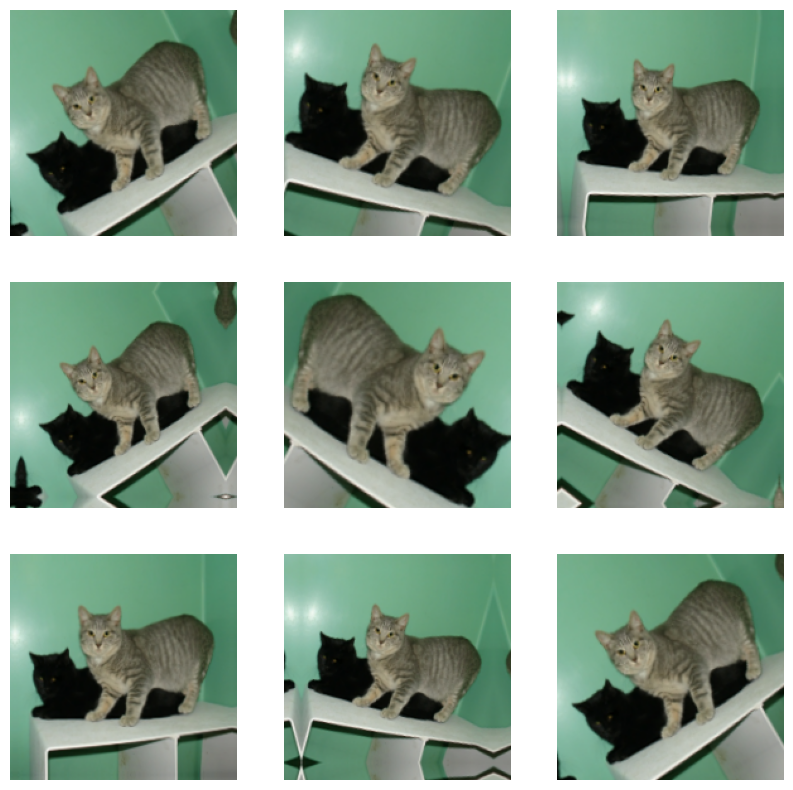

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 297ms/step - accuracy: 0.5040 - loss: 0.8771 - val_accuracy: 0.5000 - val_loss: 0.6973
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.4966 - loss: 0.6954 - val_accuracy: 0.5033 - val_loss: 0.6921
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.8135
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.5357 - loss: 0.7113 - val_accuracy: 0.6333 - val_loss: 0.6739
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.5707 - loss: 0.6809 - val_accuracy: 0.6017 - val_loss: 0.6637
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.6440 - loss: 0.6583 - val_accuracy: 0.6283 - val_loss: 0.6530
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.6293 - loss: 0.6469 - val_accuracy: 0.6400 - val_loss: 0.6341
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.6791 - loss: 0.5949 - val_accurac

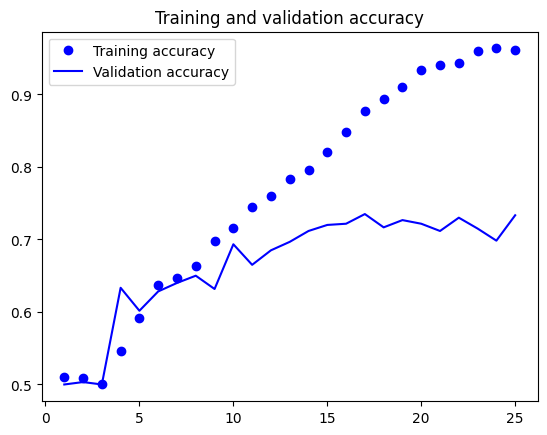

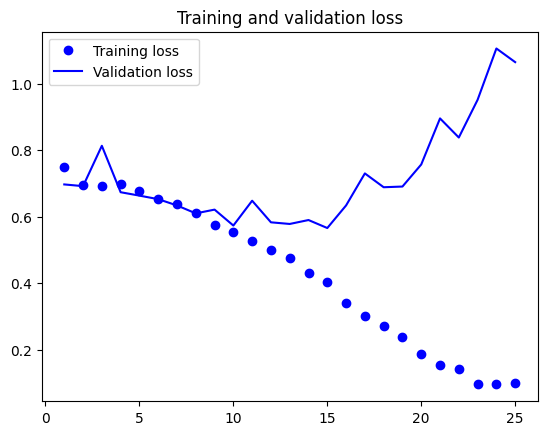

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7006 - loss: 0.6534
Test accuracy: 0.705


**Model 3: Increasing the Training sample size to 1700**

In [ ]:
import os
import shutil
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory

# 1. Function to Create Subsets
def make_subset(subset_name, original_dir, new_base_dir, start_index, end_index):
    print(f"\nCreating subset: {subset_name} from {original_dir} [{start_index}:{end_index}]")

    for category in ["cats", "dogs"]:
        src_dir = original_dir / category
        dest_dir = new_base_dir / subset_name / category

        if dest_dir.exists():
            shutil.rmtree(dest_dir)

        os.makedirs(dest_dir, exist_ok=True)

        files = sorted(os.listdir(src_dir))

        if end_index > len(files):
            print(f"⚠️ end_index {end_index} exceeds available files ({len(files)}). Adjusting...")
            end_index = len(files)

        subset_files = files[start_index:end_index]

        print(f"Copying {len(subset_files)} files from {src_dir} to {dest_dir}...")

        for fname in subset_files:
            src_file = src_dir / fname
            dst_file = dest_dir / fname

            shutil.copyfile(src_file, dst_file)

    print(f"Subset '{subset_name}' created successfully!")

# 2. Paths Setup
original_train_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small/train")
original_val_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small/validation")
original_test_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small/test")

new_base_dir = pathlib.Path("/content/drive/MyDrive/AML/cats_vs_dogs_small_subset")

# 3. Create Subsets
make_subset("train_4", original_train_dir, new_base_dir, 0, 850)
make_subset("validation_4", original_val_dir, new_base_dir, 0, 250)
make_subset("test_4", original_test_dir, new_base_dir, 0, 250)

# 4. Load the Subset Datasets
train_dataset_4 = image_dataset_from_directory(
    new_base_dir / "train_4",
    image_size=(180, 180),
    batch_size=32
)

validation_dataset_4 = image_dataset_from_directory(
    new_base_dir / "validation_4",
    image_size=(180, 180),
    batch_size=32
)

test_dataset_4 = image_dataset_from_directory(
    new_base_dir / "test_4",
    image_size=(180, 180),
    batch_size=32
)

# 5. Define the Callbacks
early_stopping_monitor = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    ),
    early_stopping_monitor
]

# 6. Build Your Model
model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Train the Model
history = model.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks
)




Creating subset: train_4 from /content/drive/MyDrive/AML/cats_vs_dogs_small/train [0:850]
Copying 850 files from /content/drive/MyDrive/AML/cats_vs_dogs_small/train/cats to /content/drive/MyDrive/AML/cats_vs_dogs_small_subset/train_4/cats...
Copying 850 files from /content/drive/MyDrive/AML/cats_vs_dogs_small/train/dogs to /content/drive/MyDrive/AML/cats_vs_dogs_small_subset/train_4/dogs...
✅ Subset 'train_4' created successfully!

Creating subset: validation_4 from /content/drive/MyDrive/AML/cats_vs_dogs_small/validation [0:250]
Copying 250 files from /content/drive/MyDrive/AML/cats_vs_dogs_small/validation/cats to /content/drive/MyDrive/AML/cats_vs_dogs_small_subset/validation_4/cats...
Copying 250 files from /content/drive/MyDrive/AML/cats_vs_dogs_small/validation/dogs to /content/drive/MyDrive/AML/cats_vs_dogs_small_subset/validation_4/dogs...
✅ Subset 'validation_4' created successfully!

Creating subset: test_4 from /content/drive/MyDrive/AML/cats_vs_dogs_small/test [0:250]
Copy

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 293ms/step - accuracy: 0.5070 - loss: 1.0374 - val_accuracy: 0.5940 - val_loss: 0.6870
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.5158 - loss: 0.6891 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - accuracy: 0.5276 - loss: 0.6942 - val_accuracy: 0.6220 - val_loss: 0.6729
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 157ms/step - accuracy: 0.5965 - loss: 0.6696 - val_accuracy: 0.5920 - val_loss: 0.6835
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 305ms/step - accuracy: 0.6088 - loss: 0.6624 - val_accuracy: 0.6080 - val_loss: 0.6463
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.6745 - loss: 0.6144 - val_accuracy: 0.6620 - val_loss: 0.6453
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.7066 - loss: 0.5574 - val_accuracy: 0.6520 - val_loss: 0.6193
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.7519 - loss: 0.4839 - val_accuracy: 0.6460

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


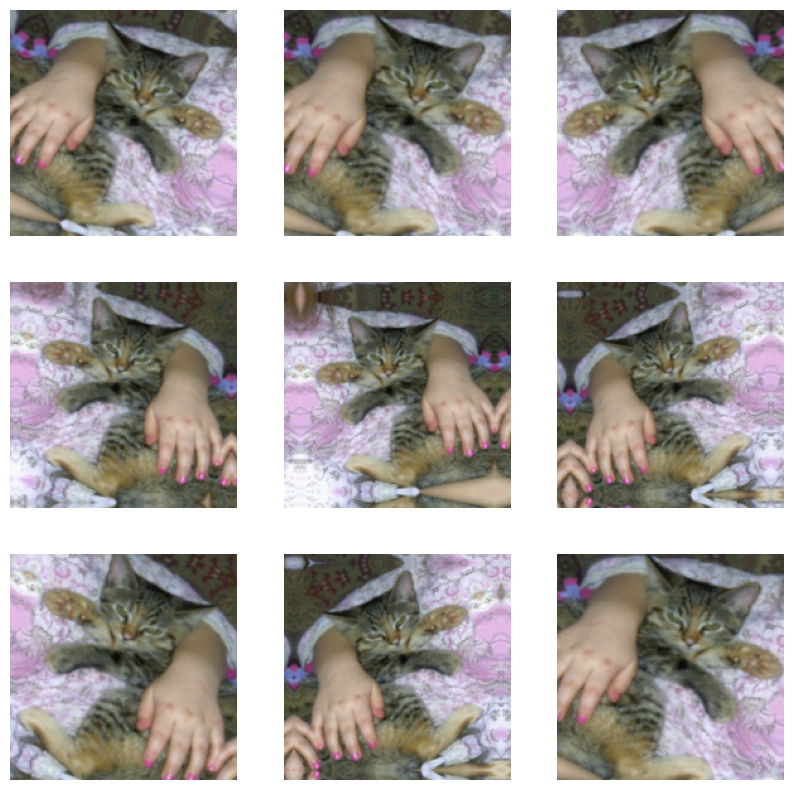

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

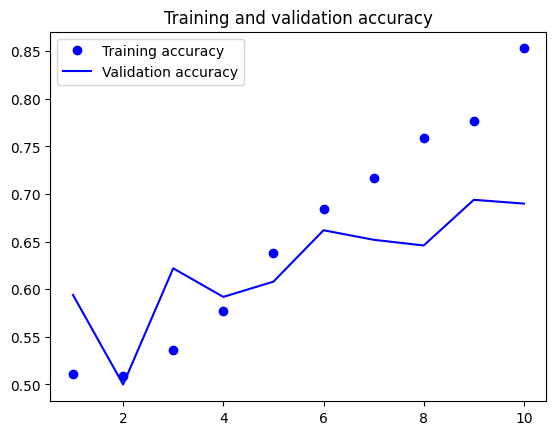

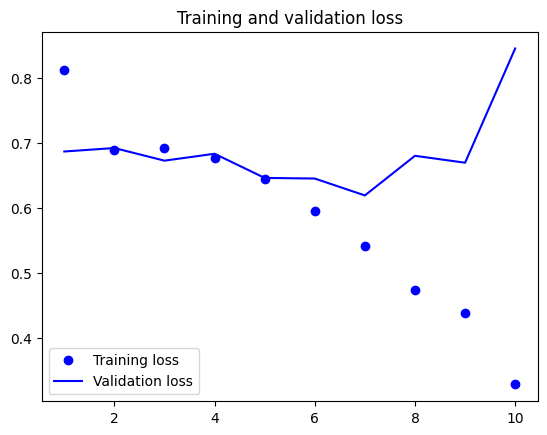

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6135 - loss: 0.6971
Test accuracy: 0.620


**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

**Pre-Trained Model - 1000 Training samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.6527 - loss: 6.6579 - val_accuracy: 0.9083 - val_loss: 1.0326
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 0.8351 - loss: 1.6189 - val_accuracy: 0.9267 - val_loss: 0.5032
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.8742 - loss: 1.0359 - val_accuracy: 0.9467 - val_loss: 0.3834
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.9015 - loss: 0.6770 - val_accuracy: 0.9517 - val_loss: 0.3052
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.9178 - loss: 0.3953 - val_accuracy: 0.9600 - val_loss: 0.2702
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.9236 - loss: 0.3897 - val_accuracy: 0.9633 - val_loss: 0.2361
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 243ms/step - accuracy: 0.9547 - loss: 0.2364 - val_accuracy: 0.9633 - val_loss: 0.2040
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - accuracy: 0.9494 - loss: 0.2120 - val_accura

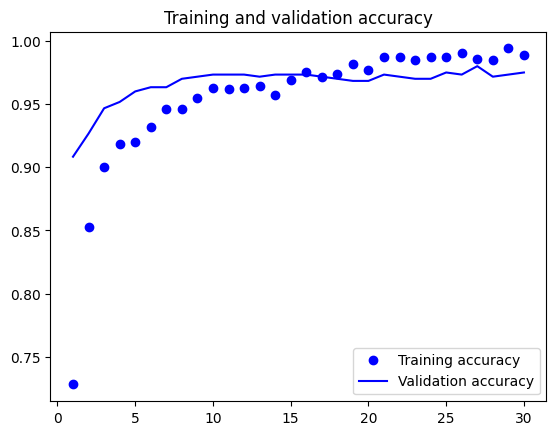

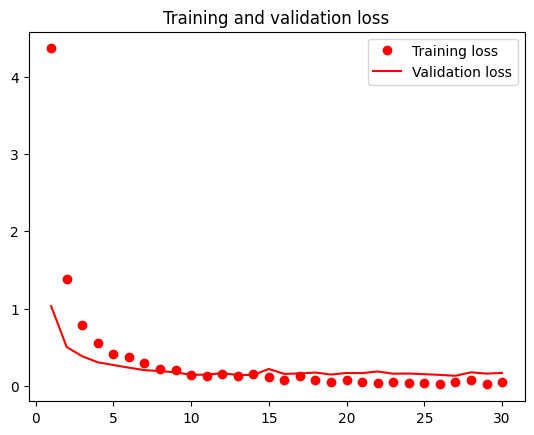

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9706 - loss: 0.2744
Test accuracy: 0.968


**Pre-Trained Model - 1500 Training samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 284ms/step - accuracy: 0.9547 - loss: 0.1862 - val_accuracy: 0.9650 - val_loss: 0.2023
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.9537 - loss: 0.2013 - val_accuracy: 0.9667 - val_loss: 0.2331
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy: 0.9573 - loss: 0.1198 - val_accuracy: 0.9667 - val_loss: 0.2546
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - accuracy: 0.9638 - loss: 0.1789 - val_accuracy: 0.9667 - val_loss: 0.2199
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9718 - loss: 0.0955 - val_accuracy: 0.9667 - val_loss: 0.2299
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.9609 - loss: 0.1488 - val_accuracy: 0.9683 - val_loss: 0.2285
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9690 - loss: 0.1466 - val_accuracy: 0.9683 - val_loss: 0.2194
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.9747 - loss: 0.0786 - val_accur

In [ ]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9655 - loss: 0.2444
Test accuracy: 0.970


**Pre-Trained Model - 1700 samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_4,
    epochs=10,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6422 - loss: 6.8720 - val_accuracy: 0.9160 - val_loss: 0.5122
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 170ms/step - accuracy: 0.8464 - loss: 1.3208 - val_accuracy: 0.9660 - val_loss: 0.2141
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9149 - loss: 0.5365 - val_accuracy: 0.9700 - val_loss: 0.1471
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.9198 - loss: 0.4791 - val_accuracy: 0.9740 - val_loss: 0.1103
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - accuracy: 0.9230 - loss: 0.3690 - val_accuracy: 0.9840 - val_loss: 0.0859
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.9363 - loss: 0.2982 - val_accuracy: 0.9820 - val_loss: 0.0860
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.9461 - loss: 0.2176 - val_accuracy: 0.9860 - val_loss: 0.0844
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.9510 - loss: 0.2066 - val_accuracy

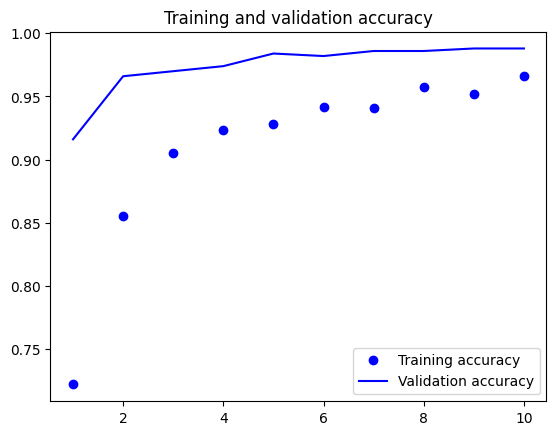

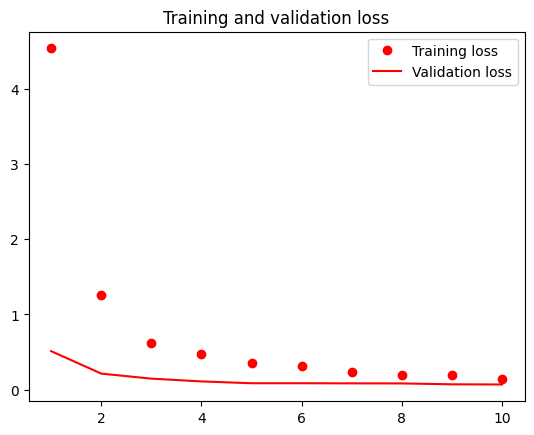

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9616 - loss: 0.2552
Test accuracy: 0.965
